In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('students_placement.csv')

In [3]:
df.shape

(300, 4)

In [16]:
df.columns

Index(['cgpa', 'iq', 'profile_score', 'placed'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cgpa           300 non-null    float64
 1   iq             300 non-null    int64  
 2   profile_score  300 non-null    int64  
 3   placed         300 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.5 KB


In [18]:
df.describe()

,cgpa,iq,profile_score,placed
count,300.000000,300.000000,300.000000,300.000000
mean,6.812000,102.570000,60.043333,0.506667
std,0.971568,8.326034,14.282440,0.500791
min,4.600000,83.000000,23.000000,0.000000
25%,6.010000,96.000000,51.000000,0.000000
50%,6.840000,103.500000,60.000000,1.000000
75%,7.502500,109.000000,69.000000,1.000000
max,9.300000,121.000000,100.000000,1.000000


In [4]:
df.sample(5)

,cgpa,iq,profile_score,placed
92,5.81,115,35,0
30,5.99,113,59,0
61,6.24,111,69,0
288,7.15,106,78,1
193,8.37,107,58,0


([<matplotlib.patches.Wedge at 0x7fa7363ac1c0>,
 [Text(-0.02303663990543217, 1.0997587522824575, ''),
  Text(0.02303663990543179, -1.0997587522824575, '')],
 [Text(-0.012565439948417547, 0.5998684103358859, '50.7%'),
  Text(0.012565439948417339, -0.5998684103358859, '49.3%')])

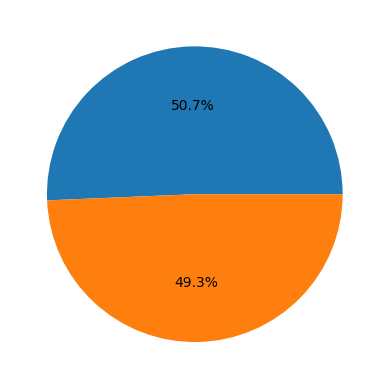

In [29]:
plt.pie(x=df["placed"].value_counts(), data=df, autopct="%1.1f%%")

<AxesSubplot: xlabel='cgpa', ylabel='Count'>

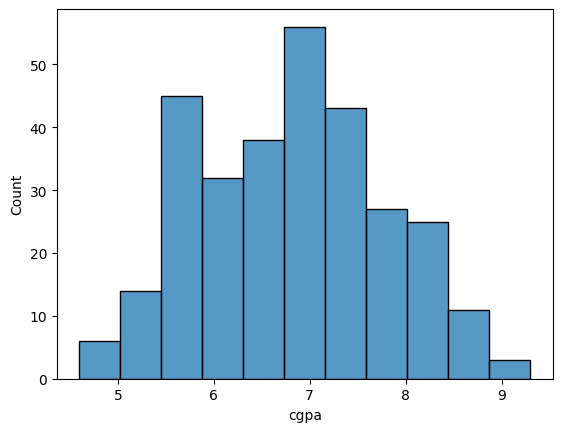

In [22]:
sns.histplot(x=df['cgpa'], data= df)

<AxesSubplot: xlabel='iq', ylabel='Count'>

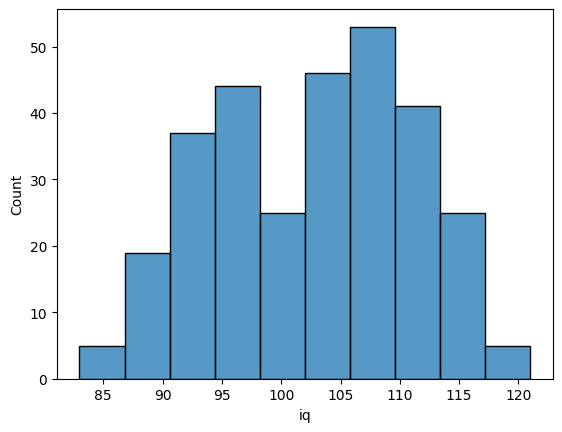

In [23]:
sns.histplot(x=df['iq'], data= df)

<AxesSubplot: xlabel='profile_score', ylabel='Count'>

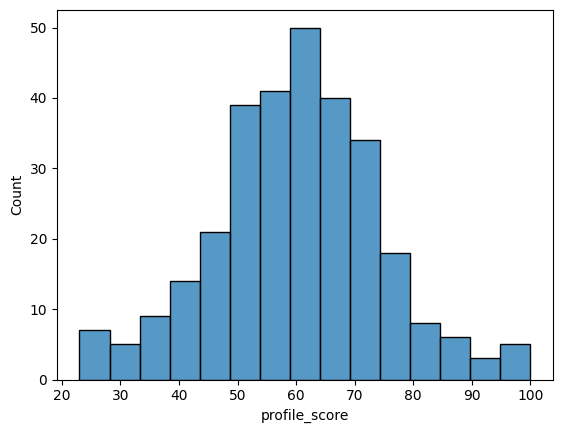

In [24]:
sns.histplot(x=df['profile_score'], data= df)

In [14]:
df.corr()

,cgpa,iq,profile_score,placed
cgpa,1.000000,-0.730260,-0.036060,0.667078
iq,-0.730260,1.000000,-0.077748,-0.758508
profile_score,-0.036060,-0.077748,1.000000,0.021235
placed,0.667078,-0.758508,0.021235,1.000000


In [5]:
X = df.drop(columns=['placed'])
y = df['placed']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)
accuracy_score(y_test,
               LogisticRegression()
               .fit(X_train_trf,y_train)
               .predict(X_test_trf))

0.8833333333333333

In [8]:
from sklearn.ensemble import RandomForestClassifier
accuracy_score(y_test,RandomForestClassifier().fit(X_train,y_train).predict(X_test))

0.8833333333333333

In [9]:
from sklearn.svm import SVC
accuracy_score(y_test,SVC(kernel='rbf').fit(X_train,y_train).predict(X_test))

0.9333333333333333

In [10]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
import pickle 
pickle.dump(svc,open('model.pkl','wb'))

In [13]:
rf.predict(np.array([4.5,56,10]).reshape(1,3))

/home/bharat/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])